In [39]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [33]:
%reset

In [40]:
# train and test data directory
train_data_dir = "../Datasets/asl_alphabet_train/"
test_data_dir = "../Datasets/asl_alphabet_test/"

# load train and test data
train_dataset = ImageFolder(train_data_dir, transform=transforms.Compose([
    transforms.Resize((200,200)), transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir, transforms.Compose([
    transforms.Resize((200,200)), transforms.ToTensor()
]))

In [41]:
img, label = train_dataset[0]
print(img.shape, label)
# torch.Size([3, 200, 200]) 0
# image has 3 channels (RGB), height 150, width 150
# image has label 0 - represents "A"

torch.Size([3, 200, 200]) 0


In [42]:
print('List of classes in dataset: \n', train_dataset.classes)
# List of classes in dataset: 
#  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']

List of classes in dataset: 
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']


Label : A


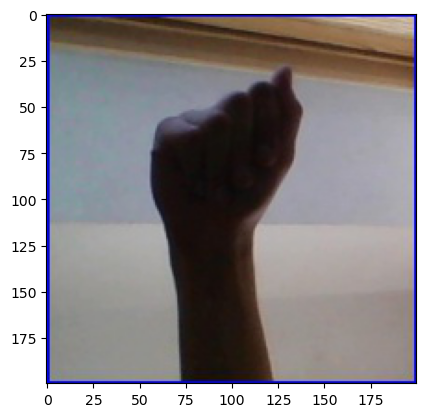

In [43]:
def display_img(img, label):
    print(f'Label : {train_dataset.classes[label]}')
    plt.imshow(img.permute(1,2,0))  # reshapes iamge from (3, 200 200) to (200, 200, 3)

# display first image in dataset
display_img(*train_dataset[0])

In [44]:
# splitting data and preparing batches

from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
valid_size = 2000
train_size = len(train_dataset) - valid_size

train_data, valid_data = random_split(train_dataset, [train_size, valid_size])
print(f'Length of Train Data : {len(train_data)}')
print(f'Length of Validation Data : {len(valid_data)}')

# Length of Train Data : 82000
# Length of Validation Data : 2000

Length of Train Data : 82000
Length of Validation Data : 2000


In [ ]:
# load train and validation data into batches
train_dl = DataLoader(train_data, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_data, batch_size*2, num_workers=4, pin_memory=True)